In [58]:
import pandas as pd
import re

#Read the data from csv into dataframe
LGA_INFO = pd.read_csv('Data/LGA_2016_VIC.csv')
LGA_SPORT_FACILITY = pd.read_csv('Data/Victoria_Sport_and_Recreation_Facility_Location.csv')
LGA_HEALTH_RISK = pd.read_csv('Data/LGA_Adults_Health Risk_Factor_Estimates.csv')

In [59]:
#Cleaning area name and corresponding area code, and make a dictionary
LGA_NAME_TO_CODE = LGA_INFO[['LGA_CODE_2016', 'LGA_NAME_2016']]
LGA_NAME_TO_CODE = LGA_NAME_TO_CODE.drop_duplicates()
LGA_NAME_TO_CODE['LGA_NAME_2016'] = LGA_NAME_TO_CODE['LGA_NAME_2016'].str.replace(r' \([^()]*\)', '', regex=True)
LGA_NAME_TO_CODE['LGA_NAME_2016'] = LGA_NAME_TO_CODE['LGA_NAME_2016'].str.upper()
LGA_DIC = LGA_NAME_TO_CODE.set_index('LGA_NAME_2016')['LGA_CODE_2016'].to_dict()

In [60]:
#Find the corresponding area codes for the sport facilities
area_code = LGA_SPORT_FACILITY['lga'].to_list()
for i in range(len(area_code)):
    if area_code[i] in LGA_DIC:
        area_code[i] = LGA_DIC[area_code[i]]
    else:
        area_code[i] = None

#Print the area names that does not have a corresponding code
for i in range(len(area_code)):
    if area_code[i] == None:
        print(LGA_SPORT_FACILITY['lga'].to_list()[i])

Bayside City Council
Mornington Peninsula Shire Council
LAKE MOUNTAIN ALPINE RESORT (UNINC)
Northern Grampians Shire Council
Port Phillip City Council
South Gippsland Shire Council
Melbourne City Council


In [61]:
#Add the area codes and clean the sport facility dataframe
LGA_SPORT_FACILITY['lga_code'] = area_code
LGA_SPORT_FACILITY = LGA_SPORT_FACILITY.dropna(subset=['lga_code'])
LGA_SPORT_FACILITY['lga_code'] = LGA_SPORT_FACILITY['lga_code'].astype(dtype='int')

In [62]:
#Group the sport facilities by area code
FACILITY_COUNT_PER_LGA = LGA_SPORT_FACILITY.groupby('lga_code', as_index=False).count()[['lga_code','lga']]

In [63]:
#Join the sport facility dataframe and health risk dataframe together by lga
JOINED = FACILITY_COUNT_PER_LGA.set_index('lga_code').join(LGA_HEALTH_RISK.set_index('lga_code'), on='lga_code', how='left', sort=False)

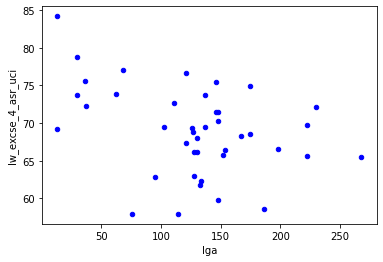

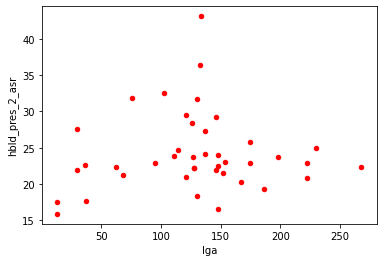

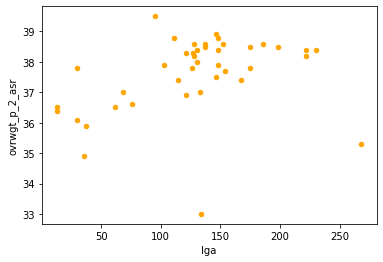

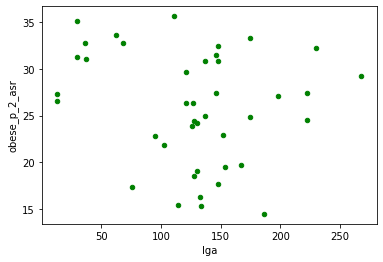

In [64]:
plot1 = JOINED.plot.scatter(x='lga', y='lw_excse_4_asr_uci', c='Blue')
plot2 = JOINED.plot.scatter(x='lga', y='hbld_pres_2_asr', c='Red')
plot3 = JOINED.plot.scatter(x='lga', y='ovrwgt_p_2_asr', c='Orange')
plot4 = JOINED.plot.scatter(x='lga', y='obese_p_2_asr', c='Green')

Coefficients:  [0.00715707]

Intercept:  36.69278855313665

Coefficient of determination: 0.11


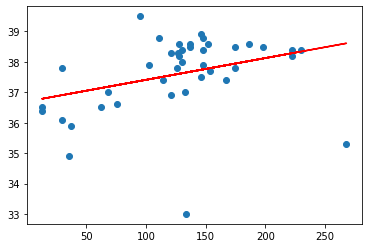

In [65]:
# overweight

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

X = JOINED[['lga']]
y = JOINED['ovrwgt_p_2_asr']

# fit a linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
y_predictions = lm.predict(X)

# coefficients
print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_train = lm.score(X, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

# plot fitting result
plt.scatter(X, y)
plt.plot(X, y_predictions, color='red')
plt.show()

Coefficients:  [0.01003355]

Intercept:  36.593931638770314

Coefficient of determination: 0.40


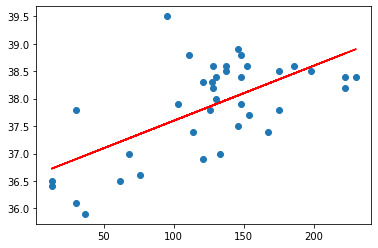

In [56]:
# Remove three outliers with y<35.5
JOINED_NoOutlier = JOINED[JOINED['ovrwgt_p_2_asr']>=35.5]
X = JOINED_NoOutlier[['lga']]
y = JOINED_NoOutlier['ovrwgt_p_2_asr']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
y_predictions = lm.predict(X)

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

r2_train = lm.score(X, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

plt.scatter(X, y)
plt.plot(X, y_predictions, color='red')
plt.show()

Coefficients:  [ 0.00000000e+00  2.43441771e-02 -6.13588919e-05]

Intercept:  35.94625827875808

Coefficient of determination: 0.48


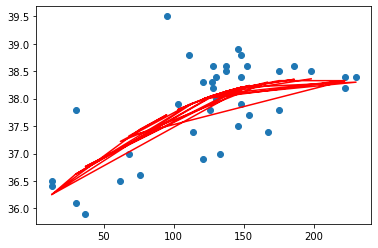

In [57]:
# fit a quadratic regression model
from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree=2)
X_polynom = polynom.fit_transform(X)
poly_reg = linear_model.LinearRegression()
poly_reg.fit(X_polynom, y)
y_predict = poly_reg.predict(polynom.fit_transform(X))

print('Coefficients: ', end = ' ')
print(poly_reg.coef_)
print('')

print('Intercept: ', end = ' ')
print(poly_reg.intercept_)
print('')

r2_train = poly_reg.score(X_polynom, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

# plot fitting results
plt.scatter(X, y)
plt.plot(X, y_predict, color='red')
plt.show()